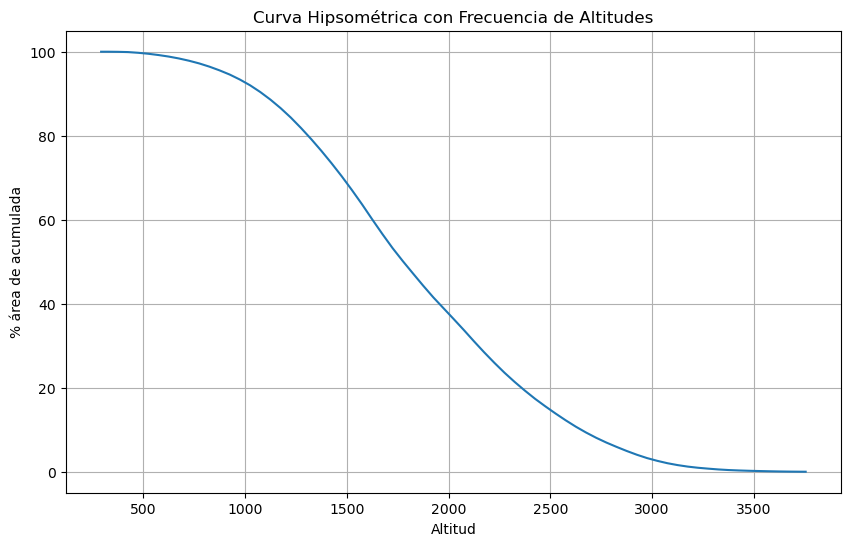

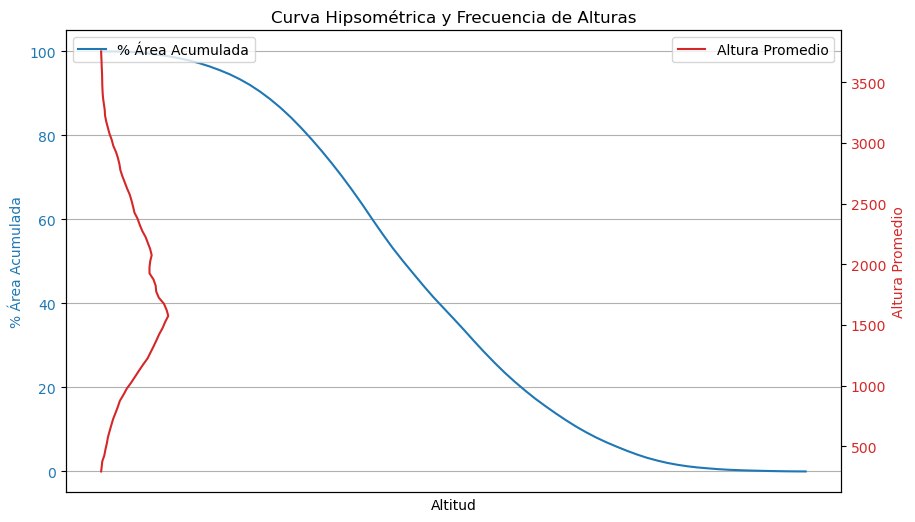


Datos del archivo Datos_Cuenca_0.xls:
Parámetro                                Valor                                    Unidad                                  
------------------------------------------------------------
Cuenca                                   2                                                                                
Area                                     2096.37196348                                                                    
Perimetro                                248.690852438                                                                    
Relación de circularidad (Rc)            6.467558555522485e-05                                                            
Altura Mínima                            287                                      m s.n.m.                                
Altura Máxima                            3758                                     m s.n.m.                                
Altura Media                           

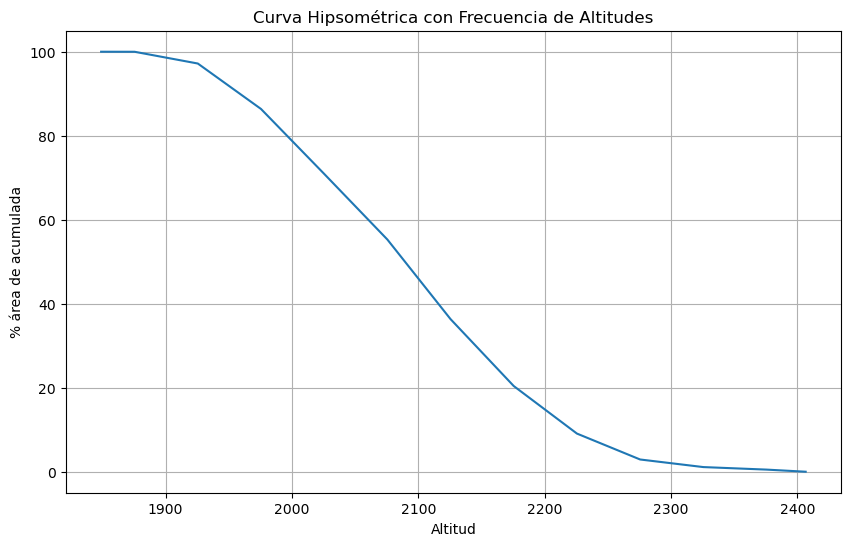

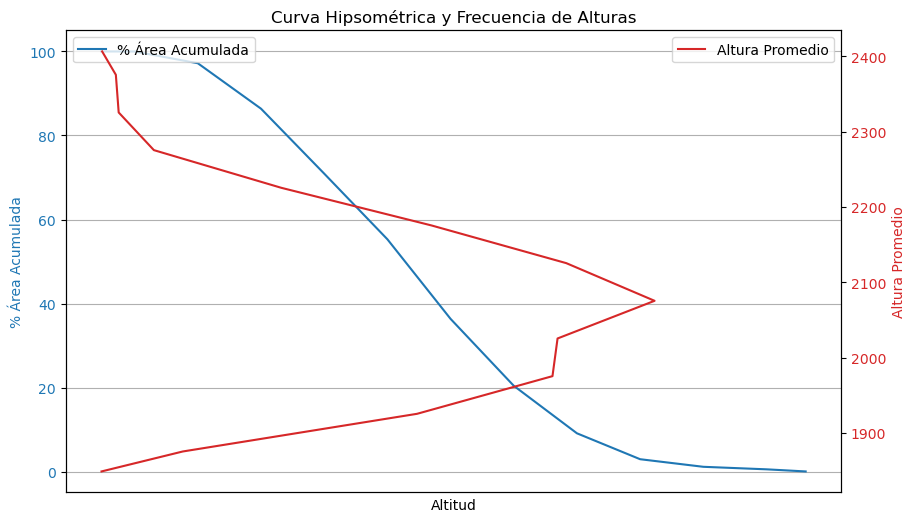


Datos del archivo Datos_Cuenca_2.xls:
Parámetro                                Valor                                    Unidad                                  
------------------------------------------------------------
Cuenca                                   6                                                                                
Area                                     10.6430188388                                                                    
Perimetro                                16.2788715491                                                                    
Relación de circularidad (Rc)            0.015094245131977923                                                             
Altura Mínima                            1848                                     m s.n.m.                                
Altura Máxima                            2412                                     m s.n.m.                                
Altura Media                           

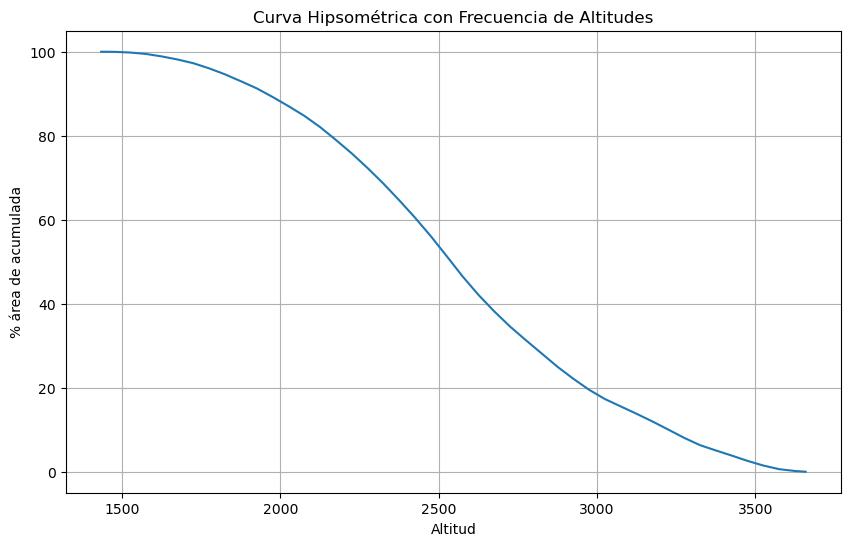

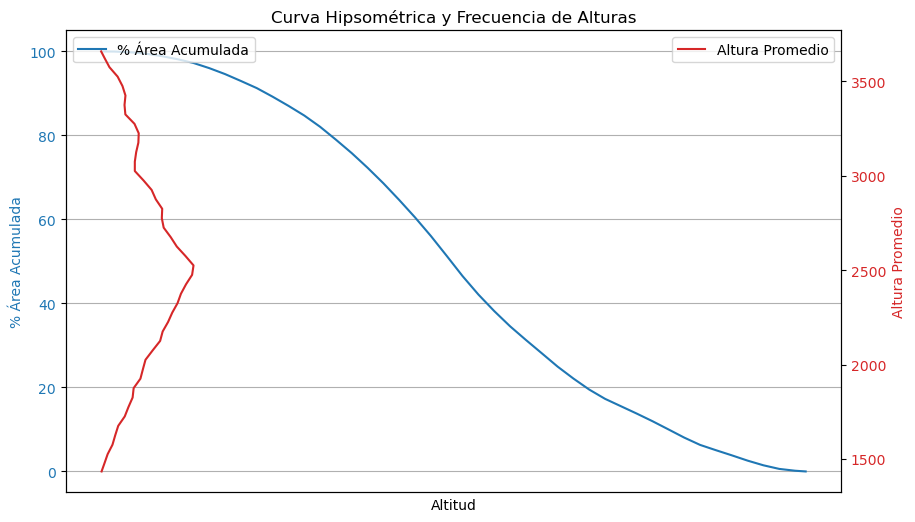


Datos del archivo Datos_Cuenca_3.xls:
Parámetro                                Valor                                    Unidad                                  
------------------------------------------------------------
Cuenca                                   8                                                                                
Area                                     232.63750458                                                                     
Perimetro                                85.3788229269                                                                    
Relación de circularidad (Rc)            0.000548731213754066                                                             
Altura Mínima                            1418                                     m s.n.m.                                
Altura Máxima                            3667                                     m s.n.m.                                
Altura Media                           

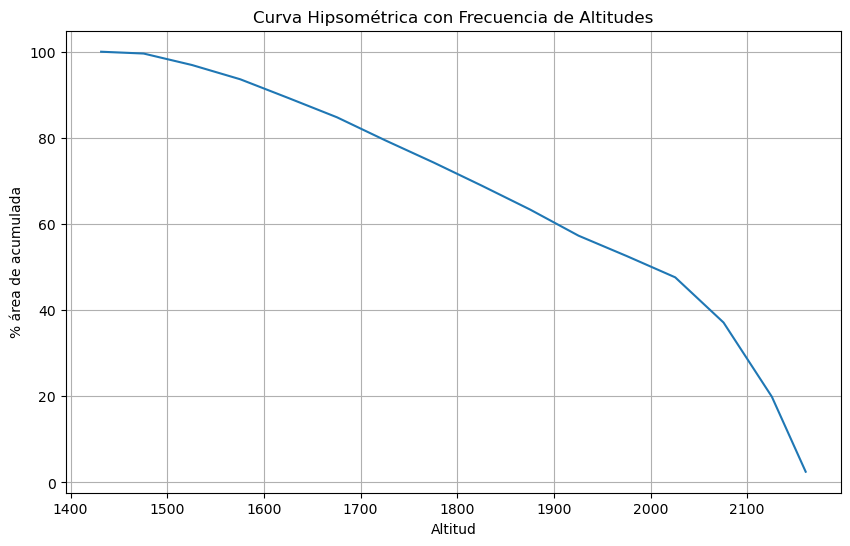

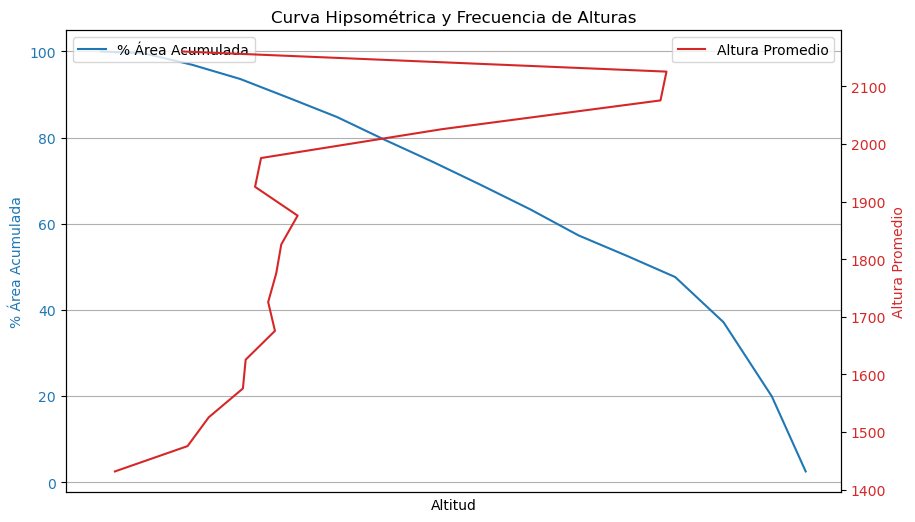


Datos del archivo Datos_Cuenca_4.xls:
Parámetro                                Valor                                    Unidad                                  
------------------------------------------------------------
Cuenca                                   18                                                                               
Area                                     3.08853943236                                                                    
Perimetro                                10.3157924873                                                                    
Relación de circularidad (Rc)            0.03758848282775285                                                              
Altura Mínima                            1413                                     m s.n.m.                                
Altura Máxima                            2170                                     m s.n.m.                                
Altura Media                           

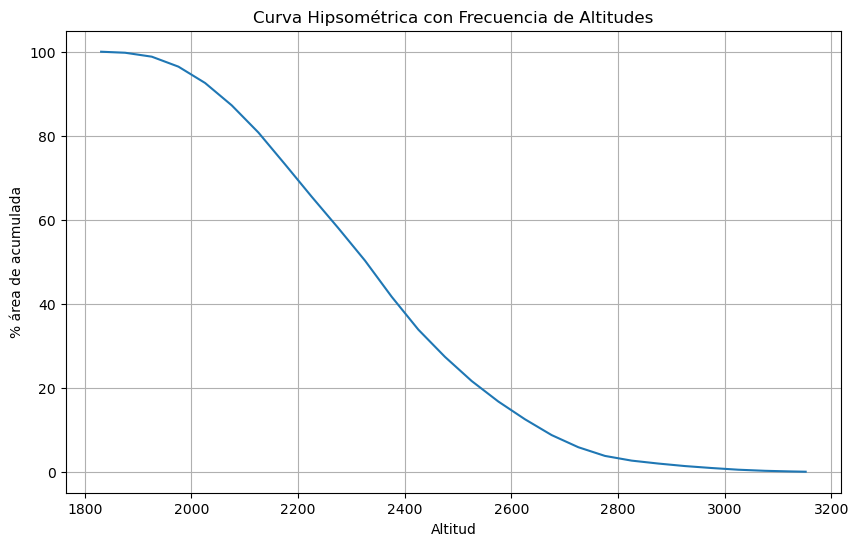

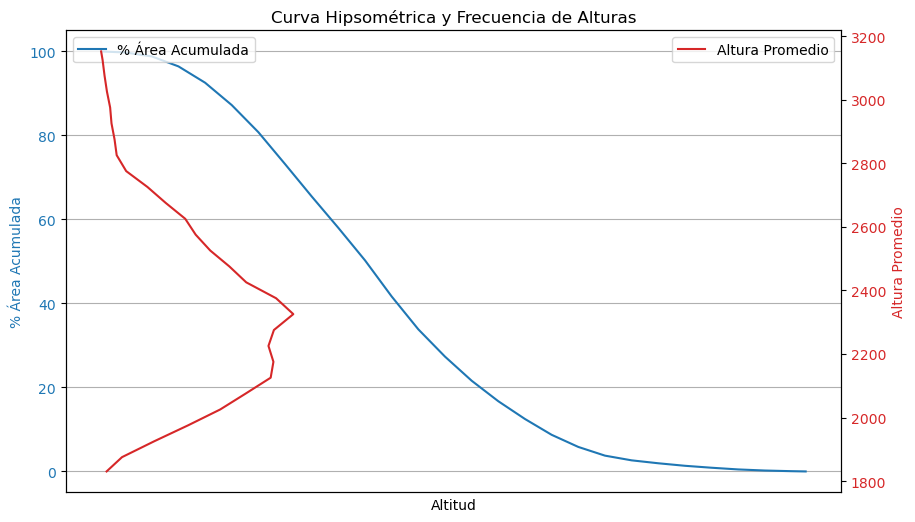


Datos del archivo Datos_Cuenca_1.xls:
Parámetro                                Valor                                    Unidad                                  
------------------------------------------------------------
Cuenca                                   4                                                                                
Area                                     44.5170184981                                                                    
Perimetro                                31.0015559322                                                                    
Relación de circularidad (Rc)            0.0041619131106532025                                                            
Altura Mínima                            1811                                     m s.n.m.                                
Altura Máxima                            3152                                     m s.n.m.                                
Altura Media                           

In [35]:
#version 4_ ArcGIS 10.8.2
# Ezequiel De Jesús Ferro Palacios
# ejferrop@unal.edu.co


import os
import xlrd
import math
from math import pi
import pandas as pd
import matplotlib.pyplot as plt
import csv
import openpyxl
import glob

datos_cuencas = {}

def obtener_unidad(header):
    """
    Función para determinar la unidad de medida a partir del encabezado de la columna.
    """
    unidades = {
        "AREA": "km^2",
        "PERIMETER": "km",
        "CENTROID_X": "grados",
        "CENTROID_Y": "grados",
        # Agrega más unidades según sea necesario
    }
    for clave in unidades:
        if clave in header:
            return unidades[clave]
    return ""  # Si no se encuentra una unidad conocida, devuelve una cadena vacía

def agregar_parametro(diccionario, parametro, valor, unidad):
    """
    Función para agregar un nuevo parámetro al diccionario.
    """
    diccionario[parametro] = (valor, unidad)

#workspace = "D:\\Morfometria\\Resultados\\Resultado_p48\\1100\\"
#workspace = "D:\\Morfometria\\Nueva carpeta\\DEM_ISA\\"
workspace = "G:\\Unidades compartidas\\Informacion_Trabajos_Estudiantes\\Cuencas_ANA\\X3\\"
#workspace = "D:\\Cuencas_ANA\\X3\\"

numero_archivos = 10
archivos_analizados = 0

for archivo in os.listdir(workspace):
    if archivo.startswith("Datos_Cuenca_") and archivo.endswith(".xls"):
        try:
            workbook = xlrd.open_workbook(os.path.join(workspace, archivo))
            worksheet = workbook.sheet_by_index(0)

            diccionario = {}

            # Leer el archivo "Areas_Curva_i.xlsx" correspondiente
            i = archivo.split("_")[2][:-4]  # Obtener el índice del archivo a partir del nombre
            ruta_areas = os.path.join(workspace, f"Areas_Curva_{i}.xls")
            ruta_cuenca = os.path.join(workspace, f"Datos_Cuenca_{i}.xls")
            ruta_MBG = os.path.join(workspace, f"Cuenca_MBG_{i}.xls")
            ruta_drenajes_clip = os.path.join(workspace, f"Drenajes_Table_{i}.xls")
            ruta_Slope = os.path.join(workspace, f"Zonal_Slope_{i}.xls")

            
            df_areas = pd.read_excel(ruta_areas)
            df_cuenca = pd.read_excel(ruta_cuenca)
            df_drenajes1 = pd.read_excel(ruta_drenajes_clip)
            df_Slope = pd.read_excel(ruta_Slope)
            df_MBG = pd.read_excel(ruta_MBG)
            df_Drenaje_ValueT = pd.read_excel(ruta_drenajes_clip)

            
            Areas = df_areas['AREA']  # Obtener el valor de la columna 'AREA' en la primera fila
            Min = df_areas['MIN']
            Max = df_areas['MAX']
            altitud_minima = df_areas['MIN'].min()
            altitud_maxima = df_areas['MAX'].max()
            altitud_media = df_areas['MEAN'].mean()
            

            #-------------------------------------------------------
            # Calcular áreas acumuladas de forma descendente
            areas_acumuladas = []
            acumulado = 0
            for Areas in reversed(Areas):
                acumulado += Areas
                areas_acumuladas.append(acumulado)

            # Lista de áreas acumuladas invertida
            Areas_acum = list(reversed(areas_acumuladas))

            #-------------------------------------------------------
            # Calcular el porcentaje de área acumulada
            area_acumulada_maxima = max(areas_acumuladas)
            porcentajes_area_acumulada = [(area / area_acumulada_maxima) * 100 for area in areas_acumuladas]

            Porcent_Area_acumu = list(reversed(porcentajes_area_acumulada))

            #-------------------------------------------------------
            # Área total
            area_total = (Areas_acum[0])
            
            # Calcular el porcentaje de área para cada valor
            Areas2 = df_areas['AREA']
            # Calcular el porcentaje de área para cada valor
            porcentajes_area = [(area * 100 / area_total) for area in Areas2]

            # Convertir los porcentajes a una lista
            porcent_area = list(porcentajes_area)

            #-------------------------------------------------------
            # altura promedio
            altura_prom = []
            for i in range (len(Min)):
                altura_prom.append((Min[i]+Max[i])/2)



            # Graficar la curva hipsométrica con frecuencia de altitudes
            plt.figure(figsize=(10, 6))
            plt.plot(altura_prom, Porcent_Area_acumu)
            plt.xlabel('Altitud')
            plt.ylabel('% área de acumulada')
            plt.title('Curva Hipsométrica con Frecuencia de Altitudes')
            plt.grid(True)
            plt.show()
            
            # Encontrar el valor máximo y mínimo
            valor_maximo = max(altura_prom)
            valor_minimo = min(altura_prom)

            # Definir el rango deseado
            rango_minimo = 0
            rango_maximo = altitud_maxima

            # Normalizar los valores
            valores_normalizados = [
                ((valor - valor_minimo) / (valor_maximo - valor_minimo)) * (rango_maximo - rango_minimo) + rango_minimo
                for valor in altura_prom
            ]
            # COREGIR EL VALOR ***100*** y adaptarlo a la CUENCA
            porcent_area2 = [valor * 100 for valor in porcent_area]


            # Crear la figura y los ejes (subplots)
            fig, ax1 = plt.subplots(figsize=(10, 6))

            # Graficar la curva hipsométrica con frecuencia de altitudes
            color = 'tab:blue'
            ax1.set_xlabel('Altitud')
            ax1.set_ylabel('% Área Acumulada', color=color)
            ax1.plot(valores_normalizados, Porcent_Area_acumu, color=color)
            ax1.tick_params(axis='y', labelcolor=color)
            ax1.grid(True)

            # Crear el segundo eje y graficar el gráfico de frecuencia de alturas
            ax2 = ax1.twinx()
            color = 'tab:red'
            ax2.set_ylabel('Altura Promedio', color=color)
            ax2.plot(porcent_area2, altura_prom, color=color)
            ax2.tick_params(axis='y', labelcolor=color)
            plt.gca().axes.get_xaxis().set_ticks([])# Ocultar los valores del eje X

            # Agregar leyenda y título
            ax1.legend(['% Área Acumulada'], loc='upper left')
            ax2.legend(['Altura Promedio'], loc='upper right')
            plt.title('Curva Hipsométrica y Frecuencia de Alturas')

            # Mostrar la figura
            plt.show()

            
            #area bajo la curva Hipsometrica
            Areaskm = df_areas['AREA']/1000000
            Mean = df_areas['MEAN']
            Mean_Min = [a - c for a, c in zip(Mean, Min)]
            RANGE = df_areas['RANGE']
            
            Hi = [a / c if c != 0 else 0 for a, c in zip(Mean_Min, RANGE)]
            suma_Hi = sum(Hi)
            promedio_Hi = suma_Hi / len(Hi)
            # Obtener la posición del valor máximo en AREA y Altitud mas frecuente
            pos_maximo = df_areas['AREA'].idxmax()
            Altitud_frecuente = df_areas['MEAN'][pos_maximo]
            
            #----------------------------------------------------------------------------------------------
            # Aquí puedes añadir el código para procesar los otros archivos según sea necesario (Slope)
            #333333333333333333333333333

            #2.3.- Cálculo de la Altitud Media Ponderada

            
            ai = df_areas['AREA']/1000000

            # altura promedio
            ci = []
            for i in range (len(Min)):
                ci.append((Min[i]+Max[i])/2)

            # Calcular el ai * ci para cada valor
            aixci = []

            aixci = [a * c for a, c in zip(ai, ci)]

            sum_ai = sum(ai)
            sum_aixci = sum(aixci)

            Altura_ponderada = sum_aixci/sum_ai

            #Cálculo de la Altitud Media Simple

            Altitud_simple = (altitud_maxima+altitud_minima)/2

            # 3.- PARAMETROS DE FORMA:
            # 3.1.- Cálculo del Indice de Gravelius (K):
            
            Area_cuenca = df_cuenca.iloc[-1]["POLY_AREA"]
            perimetro_cuenca = df_cuenca.iloc[-1]["PERIMETER"]
            ind_Gravelius = 0.28 *  perimetro_cuenca / (Area_cuenca**0.5)
            #Si valor de K se encuentra entre los rangos de 1.00 - 1.25, la forma de la cuenca es REDONDA, en caso contrario Alargada 
            R_Gravelius = ""
            if ind_Gravelius >= 1 and ind_Gravelius <= 1.25:
                R_Gravelius = "Forma casi redonda a oval"
            elif ind_Gravelius >= 1.25 and ind_Gravelius <= 1.5:
                R_Gravelius = "Forma oval – oblonga"
            else:
                R_Gravelius = "oblonga a rectangular"
            #3.2.- Cálculo del Rectángulo Equivalente:
            
            Longitud_recta = (df_MBG.iloc[-1]['EXT_MAX_Y'] - df_MBG.iloc[-1]['EXT_MIN_Y'])/1000
            #7.1.4 Ancho de la cuenca (w) [km] 
            Longitud_Ancho = (df_MBG.iloc[-1]['EXT_MAX_X'] - df_MBG.iloc[-1]['EXT_MIN_X'])/1000
            if Longitud_recta > Longitud_Ancho:
                Lado_Mayor = Longitud_recta
                Lado_Menor = Longitud_Ancho
            else: 
                Lado_Mayor = Longitud_Ancho
                Lado_Menor = Longitud_recta               
            #Lado Mayor 
            
            #Lado_Mayor = (ind_Gravelius*(Area_cuenca**0.5)/1.12)*(1+((1-((1.12/ind_Gravelius)**2))**0.5))
            #Lado Menor
            #Lado_Menor = (ind_Gravelius*(Area_cuenca**0.5)/1.12)*(1-((1-((1.12/ind_Gravelius)**2))**0.5))

            #3.3.- Cálculo del Factor Forma:
            Factor_Forma=Lado_Menor/Lado_Mayor
            Factor_Forma2 = Area_cuenca/Lado_Mayor**2
            if Factor_Forma < 1: 
                R_Factor_Forma = "Tiende a ser alargada"
            elif Factor_Forma > 1: 
                R_Factor_Forma = "Tiende a ser achatada"
            else:
                R_Factor_Forma = "Cuadrada"            

            
            
            #8.1.1.Parámetros relacionados a la red de drenaje
            #5.- PARAMETROS RELACIONADOS CON LA RED HIDROGRÁFICA
            #5.1.- Cálculo de la Densidad de Drenaje:
            
            # Crear df_drenajes_sum
            df_drenajes = df_drenajes1.groupby('grid_code').agg(
                COUNT=('grid_code', 'size'),
                SUM_LONG=('LENGTH', 'sum')
            ).reset_index()
            
            #df_drenajes = df_drenajes.sort_values(by='grid_code', ascending=True)
            df_drenajes = df_drenajes.sort_values(by='grid_code', ascending=True).reset_index(drop=True)

            #Longitud de la Red Hidrica
            Longitud_rios =sum(df_drenajes["SUM_LONG"])
            Densidad_Drenaje = Longitud_rios / Area_cuenca

            grid_code_mayor = df_drenajes['grid_code'].idxmax()
            Longitud_principal = df_drenajes['SUM_LONG'][grid_code_mayor]

            #Orden de la Red Hidrica
            Orden_redH = max(df_drenajes['grid_code'])

            Drenajes_Cantidad=df_drenajes['COUNT']
            Drenajes_numero = df_drenajes['grid_code']
            Drenajes_Longitud = df_drenajes['SUM_LONG']

            R_Drenajes_Cp = df_drenajes['COUNT'][grid_code_mayor]

            #R_Drenajes_Nu  = [f"{x}={y}" for x, y in zip(Drenajes_numero, Drenajes_Cantidad)]
            R_Drenajes_Nu= df_drenajes['COUNT'].values.tolist()
            for y in range(len(R_Drenajes_Nu)):
                R_Drenajes_Nu[y] = round(R_Drenajes_Nu[y],3)
            R_Drenajes_Nu2 = str(R_Drenajes_Nu)
            R_Drenajes_sum = sum(Drenajes_Cantidad)

            grid_code_menor = df_drenajes['grid_code'].idxmin()
            Drenajes_Lu = sum(df_drenajes['SUM_LONG'])
            Drenajes_LuN= df_drenajes['SUM_LONG'].values.tolist()
            for y in range(len(Drenajes_LuN)):
                Drenajes_LuN[y] = round(Drenajes_LuN[y],3)
            Drenajes_LuN2 = str(Drenajes_LuN)

            #Relación de longitud de los drenajes Rl o Lur.
            Drenajes_lon_cant = [x/y for x, y in zip(Drenajes_Longitud, Drenajes_Cantidad)]

            Drenajes_lur = []
            for j in range (len(Drenajes_lon_cant)-1):
                Drenajes_lur.append(round(Drenajes_Longitud[j]/Drenajes_Longitud[j+1],3))
            Drenajes_lur2 = str(Drenajes_lur)

            ##Relación de bifurcación (Rb)

            bifurcacion_Rb = []
            for h in range (len(Drenajes_Cantidad)-1):
                bifurcacion_Rb.append(round(Drenajes_Cantidad[h]/Drenajes_Cantidad[h+1],3))
            bifurcacion_Rb2 = str(bifurcacion_Rb)

            #Coeﬁciente ρ

            Coeﬁciente = [round(x/y,3) for x, y in zip(Drenajes_lur, bifurcacion_Rb)]
            Coeﬁciente2 = str(Coeﬁciente)
            
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx>>>>>
#xxxxxxxxxxxx(Los str deben corregirse para poder hacer calculos con los datos)xx>>>>>
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx>>>>>           
            
    
            #5.2.- Cálculo de la Frecuencia de los Ríos:

            #5.3.- Cálculo de la Extensión media del Escurrimiento Superficial (Es):
            Extensión_media = Area_cuenca/(4*Longitud_rios)
                        

            #6.2.- Cálculo de la Pendiente de la Cuenca

            Pendiente_Cuenca = (Altura_ponderada/(Lado_Mayor*1000))*100



            #7.2.1 Índice de compacidad o índice de Gravelius
            P= perimetro_cuenca
            A= Area_cuenca
            pi_valor = math.pi
            Compacidad = P/(2*pi_valor*((A/pi_valor)**0.5))


            #7.1.3 Longitud recta de la cuenca
            
            #Longitud_recta = (df_MBG.iloc[-1]['EXT_MAX_Y'] - df_MBG.iloc[-1]['EXT_MIN_Y'])/1000
            #7.1.4 Ancho de la cuenca (w) [km] 
            #Longitud_Ancho = (df_MBG.iloc[-1]['EXT_MAX_X'] - df_MBG.iloc[-1]['EXT_MIN_X'])/1000

            #Índice de alargamiento
            Ind_alargamiento = Lado_Mayor/Lado_Menor
            if Ind_alargamiento > 1:
                R_Ind_alargamiento = "Cuenca alargada"
            else:
                R_Ind_alargamiento = "Cuenca achatada"

            # 7.3.1 Pendiente media de la cuenca
            Slope1 = df_Slope["COUNT"]
            Slope3 = df_Slope["Rowid"]

            r1 = Slope3[len(Slope1)-1]
            Slope_prom = [3,5,9.5,16,27.5,42.5,62.5,(75+r1)/2]
            Suma_COUNT = sum(Slope1)-(Slope1[0]+Slope1[1]+Slope1[2]+Slope1[3]+Slope1[4]+Slope1[5]+Slope1[6])
            N_COUNT = [Slope1[0],Slope1[1],Slope1[2],Slope1[3],Slope1[4],Slope1[5],Slope1[6],Suma_COUNT]
            Prom_COUNT = [x * y for x, y in zip(Slope_prom, N_COUNT)]
            Sum_Prom_COUNT = sum(Prom_COUNT)

            Pendiente_media_cuenca = Sum_Prom_COUNT/sum(Slope1)

           #--------------------------------------------------    
            #8.1.2.Parámetros relacionados a la geometría y forma de la cuenca 
            #Área (A)
            #Perímetro (P )
            #Factor forma (F f )
            #Relación de elongación (Re) 
            elongacion_Re = (2*Lado_Mayor)*((Area_cuenca/pi_valor)**0.5)

            #Relación de circularidad (Rc)
            circularidad_Rc= 4*3.1416*Area_cuenca/(perimetro_cuenca**2) 

            #Coeﬁciente compacidad (Cc) 
            compacidad_Cc = 0.2841*perimetro_cuenca /(Area_cuenca**0.5)

            #Relación de textura (Rt)
            Relacion_textura_Rt = Drenajes_Cantidad[0]/perimetro_cuenca
            #Relación de aptitud (Rf)
            Relacion_aptitud_Rf = Drenajes_Longitud[0]/perimetro_cuenca
            #Wandering Ratio (Rw)
            Wandering_Ratio= Drenajes_Longitud[0]/Lado_Mayor


            
            #--------------------------------------------------------
            #8.1.3.Parámetros relacionados a la textura de la cuenca

            #Frecuencia de drenaje (Fs) F s = Nu/A
            Frecuencia_drenaje_Fs = R_Drenajes_sum/Area_cuenca
            #Densidad de drenaje (Dd) Dd = Lu/A
            Densidad_drenaje_Dd= Drenajes_Lu/Area_cuenca
            #Constante de mantenimiento de canal (C) C = 1/Dd
            Constante_mantenimiento_C = 1/Densidad_drenaje_Dd
            #Intensidad de drenaje (Di) Di = Fs/Dd
            Intensidad_drenaje_Di = Frecuencia_drenaje_Fs/Densidad_drenaje_Dd
            #Número de inﬁltración (If ) If = Dd ∗ F s
            Numero_inﬁltracion_If = Frecuencia_drenaje_Fs*Densidad_drenaje_Dd
            #Coeﬁciente de torrencialidad (Ct) Ct = N1/A
            Coeﬁciente_torrencialidad_Ct =  R_Drenajes_Nu[0]/Area_cuenca
            #Longitud del ﬂujo superﬁcial (Lg) Lg = A/(2 ∗ Lu) 
            Longitud_ﬂujo_Lg = Area_cuenca/(2*Drenajes_Lu)


            #--------------------------------------------------------
            #8.1.4.PARÁMETROS RELACIONADOS AL RELIEVE 

            #Relieve (H) H = Z − z; 
            Relieve_H = (altitud_maxima-altitud_minima) / 1000
            #Pendiente media de la cuenca(S◦)
            #Pendiente de la cuenca
            #Relación de relieve (Rh) Rh = H/Lb
            Relacion_relieve_Rh =  Relieve_H / Lado_Mayor
            #Número de robustez (Rn) Rn = Dd ∗ H
            Numero_robustez_Rn =   Densidad_drenaje_Dd * Relieve_H 
            #Índice de Melton (M) M = H/(A)0,5
            Indice_Melton_M = Relieve_H / (Area_cuenca)**0.5
            
            
            # CALCULO DE LOS TIEMPOS DE CONCENTRACIÓN
            
            S_por = (Relieve_H / Longitud_principal) * 100 # Pendiente media en porcentaje
            
            #5.4.- Cálculo del Tiempo de Concentración (Tc), Según Kirpich
            Tc = ((0.87*(Lado_Mayor**3))/Altura_ponderada)**0.385
            
            #5.5 Tiempo de concentración según Témez
            
            Tc_Temez = 0.3 * (Longitud_principal / ((Pendiente_media_cuenca)**0.25)**0.76)
            
            #5.6 Tiempo de concentración según Ventura-Heras
            
            a = (Longitud_principal) / (Pendiente_media_cuenca)**0.5
            Tc_Ventura = a * ((Area_cuenca**0.5) / Pendiente_media_cuenca)
            
            #5.7 Tiempo de concentración según Valencia y Zuluaga
            
            Tc_Valencia = 1.7694 * (Area_cuenca**0.325) * (Longitud_principal**-0.096) * (S_por**-0.290)
            
    
#--------------Imprimir---------------
#--------------Imprimir---------------
#--------------Imprimir---------------

            print(f"\nDatos del archivo {archivo}:")
            print("{:<40} {:<40} {:<40}".format("Parámetro", "Valor", "Unidad"))
            print("-" * 60)

            headers = [worksheet.cell_value(0, col_idx) for col_idx in range(worksheet.ncols)]

            for row_idx in range(1, worksheet.nrows):
                row = worksheet.row_values(row_idx)
                for idx, valor in enumerate(row):
                    if valor:
                        parametro = headers[idx]
                        unidad = obtener_unidad(parametro)
                        diccionario[parametro] = (valor, unidad)
                        #print("{:<40} {:<40} {:<40}".format(parametro, valor, unidad))
            
            # Agregar el nuevo parámetro "Relación de circularidad (Rc)"
            area = Area_cuenca
            perimetro = perimetro_cuenca
            relacion_circularidad = (4) / (perimetro ** 2)
            
            gridcode = df_cuenca.iloc[-1]["gridcode"]
            gridcode = int(gridcode)


            Rh = Relacion_relieve_Rh
            A = area
            Su = round(Orden_redH,3)
            M = Indice_Melton_M
            Torrencialidad_1 = ""
            Torrencialidad_2 = ""
            Torrencialidad_3 = ""
            susceptibilidad = ""
            # Inicializamos un contador para las condiciones de torrencialidad
            condiciones_torrenciales = 0
    
            # Evaluamos cada condición
            if Rh > 0.07 and A < 80:
                condiciones_torrenciales += 1
                Torrencialidad_1 = "Torrencial"
            elif Rh > 0.05 and A > 80:
                condiciones_torrenciales += 1
                Torrencialidad_1 = "Torrencial"
    
            if Rh > 0.12 and Su < 4:
                condiciones_torrenciales += 1
                Torrencialidad_2 = "Torrencial"
            elif Rh > 0.07 and Su == 4:
                condiciones_torrenciales += 1
                Torrencialidad_2 = "Torrencial"
            elif Rh > 0.05 and Su == 5:
                condiciones_torrenciales += 1
                Torrencialidad_2 = "Torrencial"


            if Rh > 0.04 and M < 0.2:
                condiciones_torrenciales += 1
                Torrencialidad_3 = "Torrencial"
            elif Rh > 0.07 and M > 0.4:
                condiciones_torrenciales += 1
                Torrencialidad_3 = "Torrencial"
            elif Rh > 0.12:
                condiciones_torrenciales += 1
                Torrencialidad_3 = "Torrencial"


            # Si se cumplen al menos 2 de las 3 condiciones, consideramos la cuenca como torrencial
            if condiciones_torrenciales >= 3:
                susceptibilidad = "La cuenca es Torrencial"
            else:
                susceptibilidad =  "La cuenca no es torrencial"


            
            #agregar, parametros = 
            agregar_parametro(diccionario, "Cuenca", gridcode, "")
            print("{:<40} {:<40} {:<40}".format("Cuenca", gridcode, "")) 
            
            #agregar, parametros = 
            agregar_parametro(diccionario, "Area", area, "km^2")
            print("{:<40} {:<40} {:<40}".format("Area", area, ""))            
            
            #agregar, parametros = 
            agregar_parametro(diccionario, "Perimetro", perimetro_cuenca, "")
            print("{:<40} {:<40} {:<40}".format("Perimetro", perimetro_cuenca, ""))                      
              

            agregar_parametro(diccionario, "Relación de circularidad (Rc)", relacion_circularidad, "")
            print("{:<40} {:<40} {:<40}".format("Relación de circularidad (Rc)", relacion_circularidad, ""))
            #print("{:<40} {:<40} {:<40}".format("Areas", Areas, ""))
            
            agregar_parametro(diccionario,"Altura Mínima", round(altitud_minima,3), "m s.n.m.")
            agregar_parametro(diccionario,"Altura Máxima", round(altitud_maxima,3), "m s.n.m.")
            agregar_parametro(diccionario,"Relieve (H)", round(Relieve_H,3), "m s.n.m.")
            agregar_parametro(diccionario,"Altura Media", round(altitud_media,3), "m s.n.m.")
            agregar_parametro(diccionario,"Altura mas frecuente", round(Altitud_frecuente,3), "m s.n.m.")
            agregar_parametro(diccionario,"Altura media ponderada", round(Altura_ponderada,3), "m s.n.m.")
            agregar_parametro(diccionario,"Altura media Simple", round(Altitud_simple,3), "m s.n.m.")
            
            agregar_parametro(diccionario,"indice de Gravelius", round(ind_Gravelius,3), R_Gravelius)
            agregar_parametro(diccionario,"Rectángulo Equi L. Mayor", round(Lado_Mayor,3), "km")
            agregar_parametro(diccionario,"Rectángulo Equi L. Menor", round(Lado_Menor,3), "km")
            
            #Factor forma (F f )
            agregar_parametro(diccionario,"Factor de Forma", round(Factor_Forma,3), R_Factor_Forma)
            
            #Parámetros RELACIONADOS A LA RED DE DRENAJE
            agregar_parametro(diccionario,"--------------PARÁMETROS RELACIONADOS A LA RED DE DRENAJE--------------", "", "")
            agregar_parametro(diccionario,"Orden del cauce principal (Su)", round(Orden_redH,3), "")

            #Número de drenajes (Nu)
            agregar_parametro(diccionario,"# de drenajes Cauce principal", R_Drenajes_Cp , "km")
            agregar_parametro(diccionario,"# de drenajes por Orden!", R_Drenajes_Nu2 , "km")
            agregar_parametro(diccionario,"# de drenajes total", R_Drenajes_sum , "km")

            #Longitud del cauce principal (C1)
            agregar_parametro(diccionario,"longitud del cauce principal", round(Longitud_principal,3), "km")

            #Longitud de los drenajes (Lu)
            agregar_parametro(diccionario,"Long de drenajes ", Drenajes_LuN2 , "km")
            agregar_parametro(diccionario,"Long de drenajes total", round(Drenajes_Lu,3) , "km")

            #Relación de longitud de los drenajes Rl o Lur. 
            agregar_parametro(diccionario,"longitud drenajes Rl o Lur", Drenajes_lur2, "")

            #Relación de bifurcación (Rb).
            agregar_parametro(diccionario,"Relación de bifurcación (Rb)", bifurcacion_Rb2, "")

            #Coeﬁciente 
            agregar_parametro(diccionario,"Coeﬁciente", Coeﬁciente2, "")
            agregar_parametro(diccionario,"indice de Gravelius", round(ind_Gravelius,3), R_Gravelius)
            agregar_parametro(diccionario,"indice de compacidad", round(Compacidad,3), R_Gravelius)

            #11111111111111111
            agregar_parametro(diccionario,"Ext media Escurrimiento Sup", round(Extensión_media,3), "km")
            agregar_parametro(diccionario,"Tiempo de Concentración (Kirpich)", round(Tc,3), "Horas")
            agregar_parametro(diccionario,"Tiempo de concentración (Témez)", round(Tc_Temez,3), "Horas")
            agregar_parametro(diccionario, "Tiempo de concentración (Ventura-Heras)", round(Tc_Ventura,3), "Horas")
            agregar_parametro(diccionario, "Tiempo de concentración (Valencia y Zuluaga)",round(Tc_Valencia,3), "Horas")
            agregar_parametro(diccionario,"Pendiente de la Cuenca", round(Pendiente_Cuenca,3), "%")
            
            #Longitud de la cuenca (Lb)
            agregar_parametro(diccionario,"Longitud recta de la cuenca", round(Longitud_recta,3), "km")
            agregar_parametro(diccionario,"Ancho de la cuenca", round(Longitud_Ancho,3), "km")
            
            agregar_parametro(diccionario,"Índice de alargamiento", round(Ind_alargamiento,3), R_Ind_alargamiento)
            
            agregar_parametro(diccionario,"Pendiente media de la cuenca", round(Pendiente_media_cuenca,3), "%")
            
            

            #Factor forma (F f )
            agregar_parametro(diccionario,"Factor de Forma", round(Factor_Forma,3), R_Factor_Forma)
            #Relación de elongación (Re) 
            agregar_parametro(diccionario,"Relación de elongación (Re)", round(elongacion_Re,3), "")

            #Relación de circularidad (Rc)
            agregar_parametro(diccionario,"Relación de circularidad (Rc)", round(circularidad_Rc,3), "")

            #Coeﬁciente compacidad (Cc)
            agregar_parametro(diccionario,"Coeﬁciente compacidad (Cc)", round(compacidad_Cc,3), "")

            #Relación de textura (Rt)Rt = N1/P
            agregar_parametro(diccionario,"Relación de textura (Rt)", round(Relacion_textura_Rt,3), "")

            #Relación de aptitud (Rf )Rf = C1/P
            agregar_parametro(diccionario,"Relación de aptitud (Rf)", round(Relacion_aptitud_Rf,3), "")

            #Wandering Ratio (Rw)Rw = C1/Lb
            agregar_parametro(diccionario,"Wandering Ratio (Rw)", round(Wandering_Ratio,3), "")
            
            
            
            
            #--------------------------------------------------------
            #8.1.3.Parámetros relacionados a la textura de la cuenca
            agregar_parametro(diccionario,"--------------PARÁMETROS RELACIONADOS TEXTURA DE LA CUENCA--------------", "", "")

            #Frecuencia de drenaje (Fs) F s = Nu/A
            agregar_parametro(diccionario,"Frecuencia de drenaje(Fs)", round(Frecuencia_drenaje_Fs,3), "")

            #Densidad de drenaje (Dd) Dd = Lu/A
            agregar_parametro(diccionario,"Densidad de drenaje(Dd)", round(Densidad_drenaje_Dd,3), "")

            #Constante de mantenimiento de canal (C) C = 1/Dd
            agregar_parametro(diccionario,"Constante de mant de canal(C)", round(Constante_mantenimiento_C,3), "")

            #Intensidad de drenaje (Di) Di = Fs/Dd
            agregar_parametro(diccionario,"Intensidad de drenaje(Di)", round(Intensidad_drenaje_Di,3), "")

            #Número de inﬁltración (If ) If = Dd ∗ F s
            agregar_parametro(diccionario,"Número de inﬁltración(If)", round(Numero_inﬁltracion_If,3), "")

            #Coeﬁciente de torrencialidad (Ct) Ct = N1/A
            agregar_parametro(diccionario,"Coeﬁciente torrencialidad(Ct)", round(Coeﬁciente_torrencialidad_Ct,3), "")

            #Longitud del ﬂujo superﬁcial (Lg) Lg = A/(2 ∗ Lu) 
            agregar_parametro(diccionario,"Longitud ﬂujo superﬁcial(Lg)", round(Longitud_ﬂujo_Lg,3), "")

            #Relieve (H)
            agregar_parametro(diccionario,"Relieve (H)", round(Relieve_H,3), "m s.n.m.")
            #Relación de relieve (Rh) Rh = H/Lb
            agregar_parametro(diccionario,"Relación de relieve (Rh)", round(Relacion_relieve_Rh,3), "m s.n.m.")
            #Número de robustez (Rn) Rn = Dd ∗ H
            agregar_parametro(diccionario,"Número de robustez (Rn)", round(Numero_robustez_Rn,3), "m s.n.m.")
            #Índice de Melton (M) M = H/(A)^0,5
            agregar_parametro(diccionario,"Índice de Melton (M)", round(Indice_Melton_M,3), "m s.n.m.")

            #Torrencialidad_1
            agregar_parametro(diccionario,"Torrencialidad_1", Torrencialidad_1, "")
            #Torrencialidad_2
            agregar_parametro(diccionario,"Torrencialidad_2", Torrencialidad_2, "")
            #Torrencialidad_3
            agregar_parametro(diccionario,"Torrencialidad_3", Torrencialidad_3, "")
            #Torrencialidad Total
            agregar_parametro(diccionario,"Torrencialidad_Total", susceptibilidad, "")
            
            print("{:<40} {:<40} {:<40}".format("Altura Mínima", round(altitud_minima,3), "m s.n.m."))
            print("{:<40} {:<40} {:<40}".format("Altura Máxima", round(altitud_maxima,3), "m s.n.m."))
            #print("{:<40} {:<40} {:<40}".format("Relieve (H)", round(Relieve_H,3), "m s.n.m."))
            print("{:<40} {:<40} {:<40}".format("Altura Media", round(altitud_media,3), "m s.n.m."))
            print("{:<40} {:<40} {:<40}".format("Altura mas frecuente", round(Altitud_frecuente,3), "m s.n.m."))
            print("{:<40} {:<40} {:<40}".format("Altura media ponderada", round(Altura_ponderada,3), "m s.n.m."))
            print("{:<40} {:<40} {:<40}".format("Altura media Simple", round(Altitud_simple,3), "m s.n.m."))
            
            print("{:<40} {:<40} {:<40}".format("indice de Gravelius", round(ind_Gravelius,3), R_Gravelius))
            print("{:<40} {:<40} {:<40}".format("Rectángulo Equi L. Mayor", round(Lado_Mayor,3), "km"))
            print("{:<40} {:<40} {:<40}".format("Rectángulo Equi L. Menor", round(Lado_Menor,3), "km"))
            print("{:<40} {:<40} {:<40}".format("Factor de Forma", round(Factor_Forma,3), R_Factor_Forma))
            
            
            #Parámetros RELACIONADOS A LA RED DE DRENAJE
            print("{:<40} {:<40} {:<40}".format("--------------PARÁMETROS RELACIONADOS A LA RED DE DRENAJE--------------", "", ""))
            print("{:<40} {:<40} {:<40}".format("Orden del cauce principal (Su)", round(Orden_redH,3), ""))

            #Número de drenajes (Nu)
            print("{:<40} {:<40} {:<40}".format("# de drenajes Cauce principal", R_Drenajes_Cp , "km"))
            print("{:<40} {:<40} {:<40}".format("# de drenajes por Orden!", R_Drenajes_Nu2 , "km"))
            print("{:<40} {:<40} {:<40}".format("# de drenajes total", R_Drenajes_sum , "km"))

            #Longitud del cauce principal (C1)
            print("{:<40} {:<40} {:<40}".format("longitud del cauce principal", round(Longitud_principal,3), "km"))

            #Longitud de los drenajes (Lu)
            print("{:<40} {:<40} {:<40}".format("Long de drenajes ", Drenajes_LuN2 , "km"))
            print("{:<40} {:<40} {:<40}".format("Long de drenajes total", round(Drenajes_Lu,3) , "km"))

            #Relación de longitud de los drenajes Rl o Lur. 
            print("{:<40} {:<40} {:<40}".format("longitud drenajes Rl o Lur", Drenajes_lur2, ""))

            #Relación de bifurcación (Rb).
            print("{:<40} {:<40} {:<40}".format("Relación de bifurcación (Rb)", bifurcacion_Rb2, ""))

            #Coeﬁciente 
            print("{:<40} {:<40} {:<40}".format("Coeﬁciente", Coeﬁciente2, ""))
            print("{:<40} {:<40} {:<40}".format("indice de Gravelius", round(ind_Gravelius,3), R_Gravelius))
            print("{:<40} {:<40} {:<40}".format("indice de compacidad", round(Compacidad,3), R_Gravelius))
            
          
            print("{:<40} {:<40} {:<40}".format("Ext media Escurrimiento Sup", round(Extensión_media,3), "km"))
            
            print("{:<40} {:<40} {:<40}".format("Tiempo de Concentración (Kirpich)", round(Tc,3), "Horas"))
            print("{:<40} {:<40} {:<40}".format("Tiempo de concentración (Témez)", round(Tc_Temez,3), "Horas"))
            print("{:<40} {:<40} {:<40}".format("Tiempo de concentración (Ventura-Heras)", round(Tc_Ventura,3), "Horas"))
            print("{:<40} {:<40} {:<40}".format("Tiempo de concentración (Valencia y Zuluaga)", round(Tc_Valencia,3), "Horas"))
            
            print("{:<40} {:<40} {:<40}".format("Pendiente de la Cuenca", round(Pendiente_Cuenca,3), "%"))
            
            #Longitud de la cuenca (Lb)
            
            print("{:<40} {:<40} {:<40}".format("Longitud recta de la cuenca", round(Longitud_recta,3), "km"))
            
            print("{:<40} {:<40} {:<40}".format("Ancho de la cuenca", round(Longitud_Ancho,3), "km"))
            
            
            print("{:<40} {:<40} {:<40}".format("Índice de alargamiento", round(Ind_alargamiento,3), R_Ind_alargamiento))
            
            
            print("{:<40} {:<40} {:<40}".format("Pendiente media de la cuenca", round(Pendiente_media_cuenca,3), "%"))
            
            #Factor forma (F f )
            print("{:<40} {:<40} {:<40}".format("Factor de Forma", round(Factor_Forma,3), R_Factor_Forma))
            
            #Relación de elongación (Re) 
            print("{:<40} {:<40} {:<40}".format("Relación de elongación (Re)", round(elongacion_Re,3), ""))

            #Relación de circularidad (Rc)
            print("{:<40} {:<40} {:<40}".format("Relación de circularidad (Rc)", round(circularidad_Rc,3), ""))

            #Coeﬁciente compacidad (Cc)
            print("{:<40} {:<40} {:<40}".format("Coeﬁciente compacidad (Cc)", round(compacidad_Cc,3), ""))

            #Relación de textura (Rt)Rt = N1/P
            print("{:<40} {:<40} {:<40}".format("Relación de textura (Rt)", round(Relacion_textura_Rt,3), ""))

            #Relación de aptitud (Rf )Rf = C1/P
            print("{:<40} {:<40} {:<40}".format("Relación de aptitud (Rf)", round(Relacion_aptitud_Rf,3), ""))

            #Wandering Ratio (Rw)Rw = C1/Lb
            print("{:<40} {:<40} {:<40}".format("Wandering Ratio (Rw)", round(Wandering_Ratio,3), ""))
            

            #--------------------------------------------------------
            #8.1.3.Parámetros relacionados a la textura de la cuenca
            print("{:<40} {:<40} {:<40}".format("--------------PARÁMETROS RELACIONADOS TEXTURA DE LA CUENCA--------------", "", ""))

            #Frecuencia de drenaje (Fs) F s = Nu/A
            print("{:<40} {:<40} {:<40}".format("Frecuencia de drenaje(Fs)", round(Frecuencia_drenaje_Fs,3), ""))

            #Densidad de drenaje (Dd) Dd = Lu/A
            print("{:<40} {:<40} {:<40}".format("Densidad de drenaje(Dd)", round(Densidad_drenaje_Dd,3), ""))

            #Constante de mantenimiento de canal (C) C = 1/Dd
            print("{:<40} {:<40} {:<40}".format("Constante de mant de canal(C)", round(Constante_mantenimiento_C,3), ""))

            #Intensidad de drenaje (Di) Di = Fs/Dd
            print("{:<40} {:<40} {:<40}".format("Intensidad de drenaje(Di)", round(Intensidad_drenaje_Di,3), ""))

            #Número de inﬁltración (If ) If = Dd ∗ F s
            print("{:<40} {:<40} {:<40}".format("Número de inﬁltración(If)", round(Numero_inﬁltracion_If,3), ""))

            #Coeﬁciente de torrencialidad (Ct) Ct = N1/A
            print("{:<40} {:<40} {:<40}".format("Coeﬁciente torrencialidad(Ct)", round(Coeﬁciente_torrencialidad_Ct,3), ""))

            #Longitud del ﬂujo superﬁcial (Lg) Lg = A/(2 ∗ Lu) 
            print("{:<40} {:<40} {:<40}".format("Longitud ﬂujo superﬁcial(Lg)", round(Longitud_ﬂujo_Lg,3), ""))
            
            #Relieve (H)
            print("{:<40} {:<40} {:<40}".format("Relieve (H)", round(Relieve_H,3), "m s.n.m."))
            
            #Relación de relieve (Rh) Rh = H/Lb
            print("{:<40} {:<40} {:<40}".format("Relación de relieve (Rh)", round(Relacion_relieve_Rh,3), "m s.n.m."))
            
            #Número de robustez (Rn) Rn = Dd ∗ H
            print("{:<40} {:<40} {:<40}".format("Número de robustez (Rn)", round(Numero_robustez_Rn,3), "m s.n.m."))
            
            #Índice de Melton (M) M = H/(A)^0,5
            print("{:<40} {:<40} {:<40}".format("Índice de Melton (M)", round(Indice_Melton_M,3), "m s.n.m."))        
            
            #Torrencialidad_1
            print("{:<40} {:<40} {:<40}".format("Torrencialidad_1", Torrencialidad_1, "")) 
            #Torrencialidad_2
            print("{:<40} {:<40} {:<40}".format("Torrencialidad_2", Torrencialidad_2, ""))
            #Torrencialidad_3
            print("{:<40} {:<40} {:<40}".format("Torrencialidad_3", Torrencialidad_3, ""))
            #Torrencialidad Total
            print("{:<40} {:<40} {:<40}".format("Torrencialidad_Total", susceptibilidad, ""))




            diccionario_cuenca = {}

            # Agregar el código de la cuenca al diccionario
            diccionario_cuenca["Cuenca"] = (gridcode)
            diccionario_cuenca["Area"] = (area)
            diccionario_cuenca["Perimetro"] = (perimetro_cuenca)
            diccionario_cuenca["Relación de circularidad (Rc)"] = (relacion_circularidad)
            diccionario_cuenca["Altura Mínima"] = (round(altitud_minima, 3))
            diccionario_cuenca["Altura Máxima"] = (round(altitud_maxima, 3))
            diccionario_cuenca["Relieve (H)"] = (round(Relieve_H, 3))
            diccionario_cuenca["Altura Media"] = (round(altitud_media, 3))
            diccionario_cuenca["Altura mas frecuente"] = (round(Altitud_frecuente, 3))
            diccionario_cuenca["Altura media ponderada"] = (round(Altura_ponderada, 3))
            diccionario_cuenca["Altura media Simple"] = (round(Altitud_simple, 3))
            diccionario_cuenca["indice de Gravelius"] = (round(ind_Gravelius, 3))
            diccionario_cuenca["Rectángulo Equi L. Mayor"] = (round(Lado_Mayor, 3))
            diccionario_cuenca["Rectángulo Equi L. Menor"] = (round(Lado_Menor, 3))
            diccionario_cuenca["Factor de Forma"] = (round(Factor_Forma, 3))
            diccionario_cuenca["Longitud recta de la cuenca"] = (round(Longitud_recta, 3))
            diccionario_cuenca["Orden del cauce principal (Su)"] = (round(Orden_redH, 3))
            diccionario_cuenca["# de drenajes Cauce principal"] = (R_Drenajes_Cp)
            diccionario_cuenca["# de drenajes por Orden!"] = (R_Drenajes_Nu2)
            diccionario_cuenca["# de drenajes total"] = (R_Drenajes_sum)
            diccionario_cuenca["longitud del cauce principal"] = (round(Longitud_principal, 3))
            diccionario_cuenca["Long de drenajes"] = (Drenajes_LuN2)
            diccionario_cuenca["Long de drenajes total"] = (round(Drenajes_Lu, 3))
            diccionario_cuenca["longitud drenajes Rl o Lur"] = (Drenajes_lur2)
            diccionario_cuenca["Relación de bifurcación (Rb)"] = (bifurcacion_Rb2)
            diccionario_cuenca["Coeﬁciente"] = (Coeﬁciente2)
            diccionario_cuenca["indice de Gravelius"] = (round(ind_Gravelius, 3))
            diccionario_cuenca["indice de compacidad"] = (round(Compacidad, 3))
            diccionario_cuenca["Ext media Escurrimiento Sup"] = (round(Extensión_media, 3))
            diccionario_cuenca["Tiempo de Concentración (Kirpich)"] = (round(Tc, 3))
            diccionario_cuenca["Tiempo de concentración (Témez)"] = (round(Tc_Temez,3))
            diccionario_cuenca["Tiempo de concentración (Ventura-Heras)"] = (round(Tc_Ventura,3))
            diccionario_cuenca["Tiempo de concentración (Valencia y Zuluaga)"] = (round(Tc_Valencia,3))
            diccionario_cuenca["Pendiente de la Cuenca"] = (round(Pendiente_Cuenca, 3))
            diccionario_cuenca["Ancho de la cuenca"] = (round(Longitud_Ancho, 3))
            diccionario_cuenca["Índice de alargamiento"] = (round(Ind_alargamiento, 3))
            diccionario_cuenca["Pendiente media de la cuenca"] = (round(Pendiente_media_cuenca, 3))
            diccionario_cuenca["Relación de elongación (Re)"] = (round(elongacion_Re, 3))
            diccionario_cuenca["Relación de circularidad (Rc)"] = (round(circularidad_Rc, 3))
            diccionario_cuenca["Coeﬁciente compacidad (Cc)"] = (round(compacidad_Cc, 3))
            diccionario_cuenca["Relación de textura (Rt)"] = (round(Relacion_textura_Rt, 3))
            diccionario_cuenca["Relación de aptitud (Rf)"] = (round(Relacion_aptitud_Rf, 3))
            diccionario_cuenca["Wandering Ratio (Rw)"] = (round(Wandering_Ratio, 3))
            diccionario_cuenca["Frecuencia de drenaje(Fs)"] = (round(Frecuencia_drenaje_Fs, 3))
            diccionario_cuenca["Densidad de drenaje(Dd)"] = (round(Densidad_drenaje_Dd, 3))
            diccionario_cuenca["Constante de mant de canal(C)"] = (round(Constante_mantenimiento_C, 3))
            diccionario_cuenca["Intensidad de drenaje(Di)"] = (round(Intensidad_drenaje_Di, 3))
            diccionario_cuenca["Número de inﬁltración(If)"] = (round(Numero_inﬁltracion_If, 3))
            diccionario_cuenca["Coeﬁciente torrencialidad(Ct)"] = (round(Coeﬁciente_torrencialidad_Ct, 3))
            diccionario_cuenca["Longitud ﬂujo superﬁcial(Lg)"] = (round(Longitud_ﬂujo_Lg, 3))
            diccionario_cuenca["Relación de relieve (Rh)"] = (round(Relacion_relieve_Rh, 3))
            diccionario_cuenca["Número de robustez (Rn)"] = (round(Numero_robustez_Rn, 3))
            diccionario_cuenca["Índice de Melton (M)"] = (round(Indice_Melton_M, 3))
            diccionario_cuenca["Torrencialidad_1"] = (Torrencialidad_1)
            diccionario_cuenca["Torrencialidad_2"] = (Torrencialidad_2)            
            diccionario_cuenca["Torrencialidad_3"] = (Torrencialidad_3)            
            diccionario_cuenca["Torrencialidad_Total"] = (susceptibilidad)          
                      
            
            # Agregar el diccionario de la cuenca al diccionario principal
            datos_cuencas[gridcode] = diccionario_cuenca

        except Exception as e:
            print(f"Error al procesar el archivo {archivo}: {e}")

# Crear un DataFrame de Pandas a partir del diccionario de cuencas
df = pd.DataFrame.from_dict(datos_cuencas, orient='index')

# Construir la ruta del archivo de salida
ruta_salida = os.path.join(workspace, "tabla_cuencas.xlsx")

# Exportar el DataFrame a un archivo Excel
df.to_excel(ruta_salida, index=True, header=True)
                                                      

print("\nFin del proceso.")